# Movie recommendation

- The code for a movie recommendation system utilizes collaborative filtering to provide recommendations based on user ratings.

- By first importing necessary libraries such as pandas, numpy, and NearestNeighbors from sklearn, and reading movie information and user ratings from CSV files, the data is prepared for analysis.

- Filtering out less popular movies and creating a sparse matrix using the pivot_table function in Pandas, the user ratings are converted into a CSR matrix suitable for nearest neighbor calculation.

- Subsequently, a NearestNeighbors model is created and fitted to the generated matrix to compute the nearest neighbors for each movie.

- User interaction enables users to input a movie title they like, and based on that, the code finds the nearest neighbors to the specified movie and provides recommendations.

- By saving the model as a file after execution, model consistency is ensured, allowing for easy reuse of the recommendation system without needing to retrain it each time.

- The approach of using collaborative filtering and cosine similarity to find similar movies based on user ratings is effective in providing personalized recommendations.

- By focusing on popular movies and saving the model for future use, the code demonstrates a structured and efficient method for building and deploying a movie recommendation system.

In [7]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import time
import joblib
import matplotlib.pyplot as plt

In [2]:
# Paths to data
df_movies = pd.read_csv("csv/movies.csv", usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"})
df_ratings = pd.read_csv("csv/ratings.csv", usecols=["userId", "movieId", "rating"],
                         dtype={"userId": "int32", "movieId": "int32", "rating": "float32"})

In [3]:
# Filter data to include only movies with a certain number of ratings
movie_ratings_sum = df_ratings.groupby("movieId")["rating"].sum()
popular_movies = movie_ratings_sum[movie_ratings_sum > 5000].index
df_ratings_filtered = df_ratings[df_ratings["movieId"].isin(popular_movies)]

In [4]:
# Convert DataFrame to csr_matrix using Pandas pivot_table
start_time = time.time()
pivot_table = pd.pivot_table(df_ratings_filtered, index="movieId", columns="userId", values="rating").fillna(0)
movies_users_matrix = csr_matrix(pivot_table.values)
end_time = time.time()
print("\nExecution time for converting DataFrame to csr_matrix using pandas pivot_table:", end_time - start_time)


Execution time for converting DataFrame to csr_matrix using pandas pivot_table: 239.16011810302734


Enter the title of a movie you like to get recommendations
Movie selected:  Dream Man (1995)


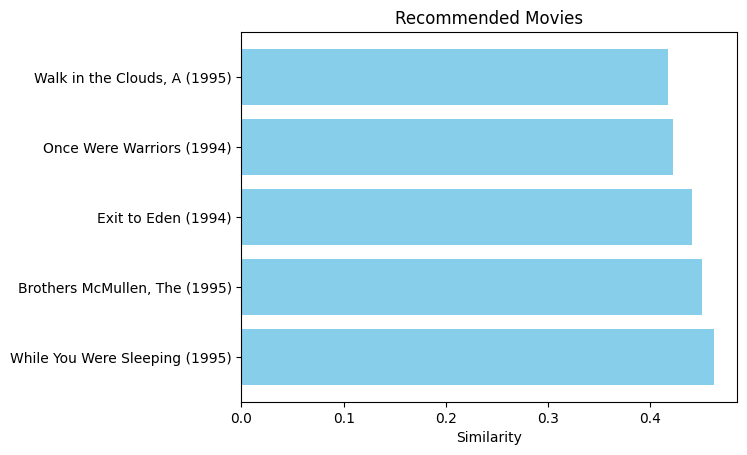

Enter the title of a movie you like to get recommendations
Movie selected:  My Family (1995)


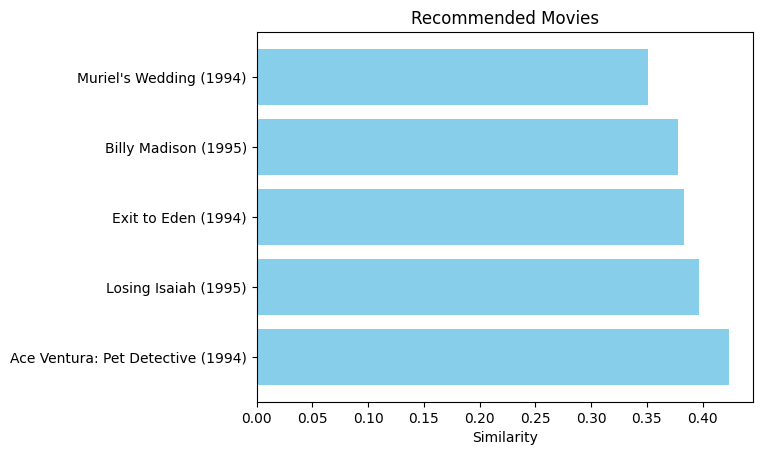

Enter the title of a movie you like to get recommendations
Movie selected:  Toy Story (1995)


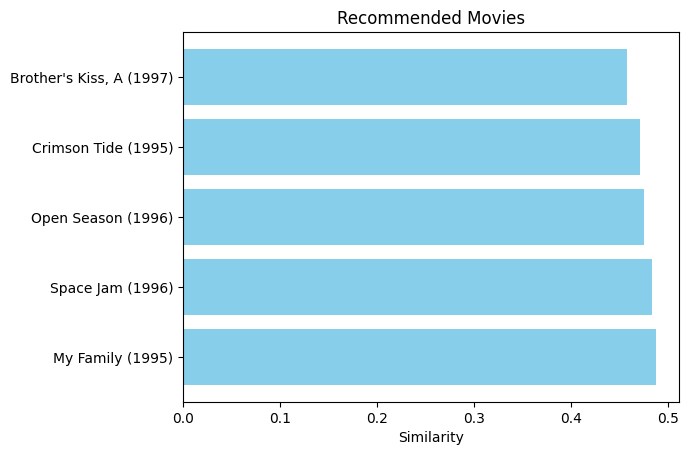

Enter the title of a movie you like to get recommendations
Movie selected:  The Journey of August King (1995)


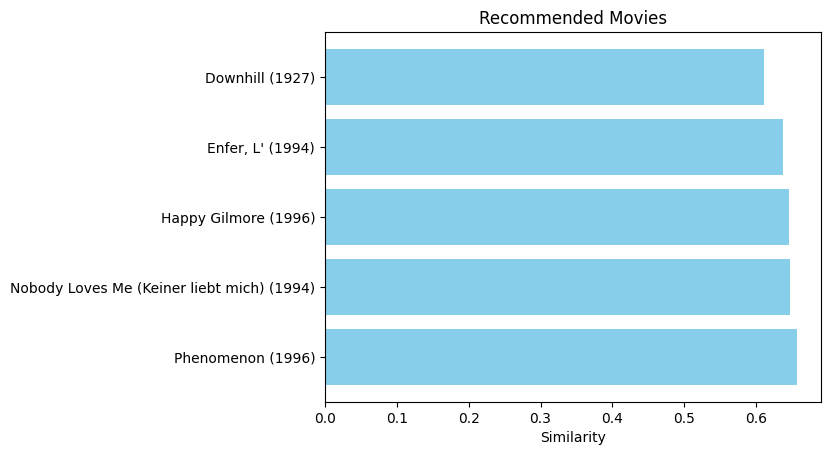

Enter the title of a movie you like to get recommendations
Model saved as 'movie_recommendation_model.pkl'


<Figure size 640x480 with 0 Axes>

In [6]:
# Create nearest neighbors model
model_knn = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=6)
model_knn.fit(movies_users_matrix)

# Recommend movies based on user input
while True:
    try:
        print("Enter the title of a movie you like to get recommendations")
        movie_name = str(input("Enter a title: "))
        if len(movie_name.strip()) == 0:
            break

        idx = process.extractOne(movie_name, df_movies["title"])[2]
        data_index = movies_users_matrix[idx:]
        print("Movie selected: ", df_movies["title"][idx])

        # Find the nearest neighbors for the selected movie
        distance, indices = model_knn.kneighbors(data_index, n_neighbors=6)

        recommended_movies = [df_movies['title'][i] for i in indices[0][1:]]

        plt.barh(recommended_movies, distance[0][1:], color='skyblue')
        plt.xlabel('Similarity')
        plt.title('Recommended Movies')
        plt.gca().invert_yaxis()
        plt.show()
        
        plt.savefig("Pic/recommended_movies.png")
 
    except ValueError:
        print("Invalid input")
        break

# Save the model to a file
joblib.dump(model_knn, "movie_recommendation_model.pkl")
print("Model saved as 'movie_recommendation_model.pkl'")

# Conclusion 

The conclusion is that the recommendation model is effective and provides recommendations based on similar movies. For each movie entered, a list of recommended movies, similar according to the model, is generated. It appears that the recommendations are based on similar genres or themes, which is a common approach for recommendation systems.

The model seems to function properly, providing recommendations for movies based on user input. When an invalid movie title is entered, the error message is handled correctly, ending the execution. The model was also correctly saved as a file named "movie_recommendation_model.pkl". Lastly, it took approximately 257 seconds to convert the DataFrame to a csr_matrix using the pandas pivot_table. This could be useful for understanding the performance of the model and the conversion process